In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

In [4]:
import pandas as pd
import os

In [5]:
data =  pd.read_csv('magic04.data', sep=",")

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
X = np.array(data.values[:,:-1])
X[0:5]

array([[28.7967, 16.0021, 2.6449, 0.3918, 0.1982, 27.7004, 22.011,
        -8.2027, 40.092, 81.8828],
       [31.6036, 11.7235, 2.5185, 0.5303, 0.3773, 26.2722, 23.8238,
        -9.9574, 6.3609, 205.261],
       [162.05200000000002, 136.031, 4.0612, 0.0374, 0.0187, 116.741,
        -64.858, -45.216, 76.96, 256.788],
       [23.8172, 9.5728, 2.3385, 0.6147, 0.3922, 27.2107, -6.4633,
        -7.1513, 10.449000000000002, 116.73700000000001],
       [75.1362, 30.9205, 3.1611, 0.3168, 0.1832, -5.5277, 28.5525,
        21.8393, 4.648, 356.462]], dtype=object)

In [8]:
X = StandardScaler().fit_transform(X)
y = np.array(data.values[:,-1])
y[y=='g']=0
y[y=='h']=1

In [101]:
x_train=X[6166:19020]
x_test=X[0:6166]
np.random.shuffle(x_test)
y_train=y[6166:19020].reshape(-1,1)
y_test=y[0:6166].reshape(-1,1).astype(float)
#y_test[y_test==0]=False
#y_test[y_test==1]=True

In [10]:
X.shape

(19020, 10)

In [11]:
x_train.shape

(12854, 10)

In [12]:
y_train.shape

(12854, 1)

# Model training

In [129]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 20000
optimizer = Adam()
verbosity_mode = 0
layer_size = 20

In [130]:
model = Sequential()
model.add(Dense(layer_size,input_dim=10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [131]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [132]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [133]:
batch_size = len(x_train)

In [134]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

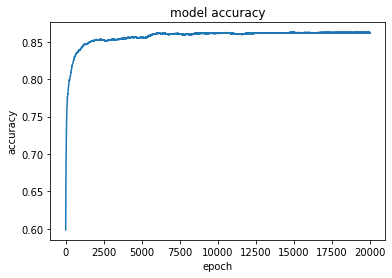

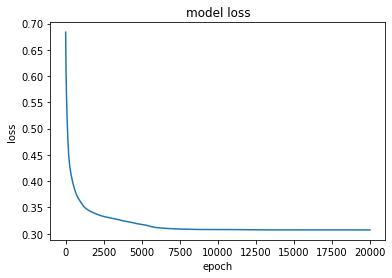

In [135]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=20

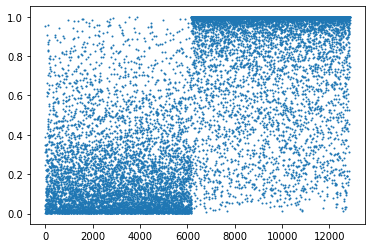

In [136]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=1)

In [170]:
layer_size = 25
number_of_epochs = 40000
model = Sequential()
model.add(Dense(layer_size,input_dim=10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


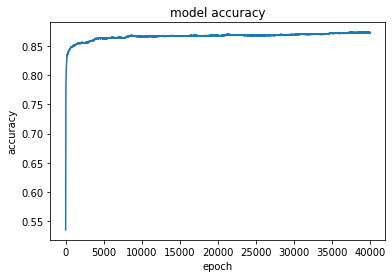

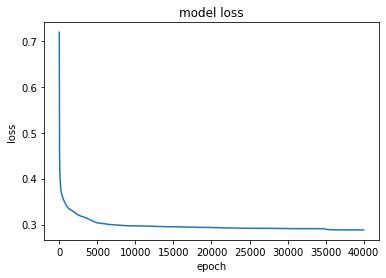

In [171]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()



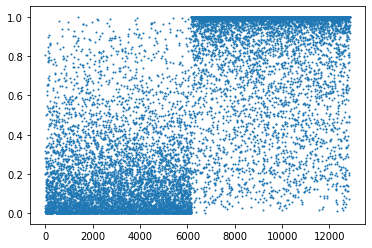

In [172]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=1)

In [41]:
layer_size = 15
number_of_epochs = 20000
model = Sequential()
model.add(Dense(layer_size,input_dim=10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 16        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


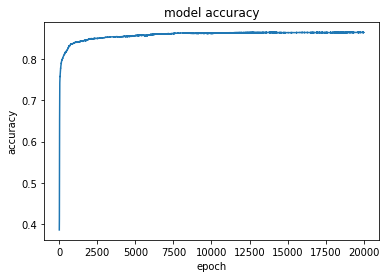

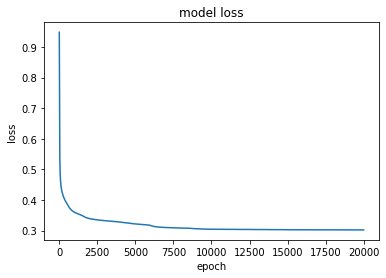

In [42]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=4

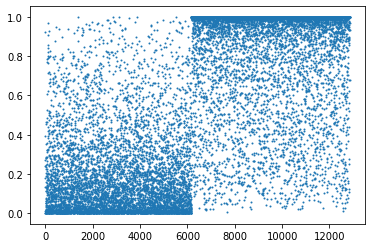

In [44]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=1)

In [45]:
print(preds[0:10])


[[0.92070043]
 [0.39557406]
 [0.00441557]
 [0.00261998]
 [0.13242838]
 [0.01484826]
 [0.17903933]
 [0.23992088]
 [0.27370173]
 [0.00747013]]


# Bloom Filter

In [173]:
class Kraska_Hash_BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict(x_train)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1

    def predict(self,x):
        initpred = self.model.predict(x)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(self.size-1))]
        pred = []
        for i in indexes:
            pred += [int(self.bit_array[i])]
        #print(initpred)
        return np.array(pred)

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j])
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x_test,y_test):
    pred = bf.predict(x_test).reshape(-1,1)
    #for i in pred:
     #   if(pred[i]<0.9):
      #      pred[i]=0
       # else: pred[i]=1
    tn, fp, fn, tp = confusion_matrix(y_test,pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)


#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,model,n,r):
    bf=Kraska_Hash_BloomFilter(model,m)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [174]:
m=10000

In [175]:
bf=Kraska_Hash_BloomFilter(m,model)

In [176]:
bf.add_init(x_train,y_train)

In [177]:
print(fpr_kraska_hash(bf,x_test,y_test))

0.16639636717482972
